## Multiple Linear Regression From Scratch 

In [56]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


### Load and Prepare Data

In [59]:

train_data = np.array(pd.read_csv("data/usa-housing-train-preprocessed.csv"))
test_data = np.array(pd.read_csv("data/usa-housing-test-preprocessed.csv"))
train_data.shape , test_data.shape


((3500, 7), (1500, 7))

In [60]:

train_set = train_data[:, 1:]
x_train = train_set[:, 0:5]
y_train = train_set[:, 5]


### Visualize Data

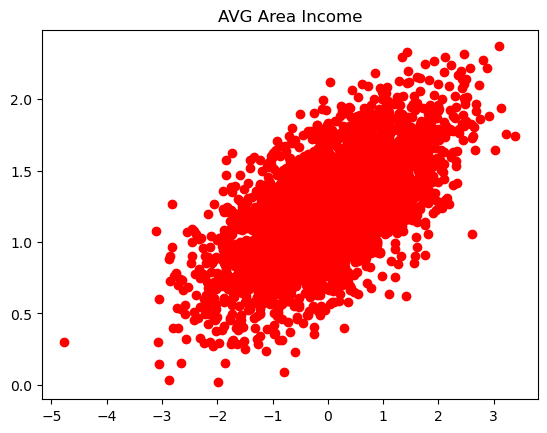

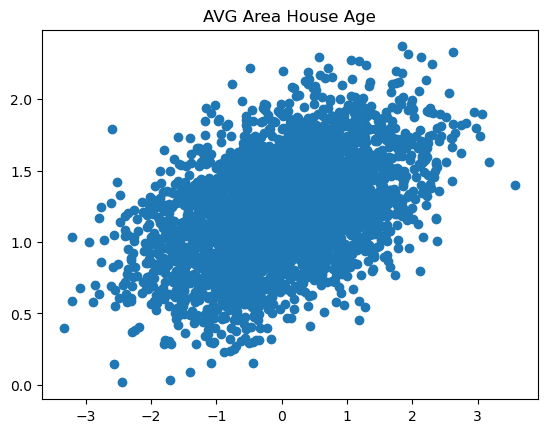

In [64]:

plt.scatter(x_train[:, 0], y_train, color="red")
plt.title("AVG Area Income")
plt.show()

plt.scatter(x_train[:, 1], y_train)
plt.title("AVG Area House Age")
plt.show()


### Define Multiple Linear Regression Functions

In [67]:

def multi_reg(x, w):
    y_hat = 0
    for xi, wi in zip(x.T, w):
        y_hat += xi * wi
    return y_hat


In [69]:

def mse(y, y_hat):
    loss = np.mean((y - y_hat) ** 2)
    return loss


In [71]:

def gradient(x, y, y_hat):
    grads = []
    for xi in x.T:
        grads.append(2 * np.mean(xi * (y_hat - y)))
    grads = np.array(grads)
    return grads


In [73]:

def gradient_descent(w, eta, grad):
    w -= eta * grad
    return w


In [74]:

def Mae(y, y_hat):
    loss = np.mean(np.absolute(y - y_hat))
    return loss


In [75]:

def r2(y, yhat):
    return 1 - np.sum((y - yhat) ** 2) / np.sum((y - y.mean()) ** 2)


### Train the Model

In [80]:

eta = 0.01
n_epochs = 2000
n, m = x_train.shape
w = np.random.randn(m + 1)
x_train = np.hstack((np.ones((n, 1)), x_train))
error_hist = []

for epoch in range(n_epochs):
    # Predictions
    y_hat = multi_reg(x_train, w)

    # Loss
    e = mse(y_train, y_hat)
    error_hist.append(e)
    
    # Gradients
    grads = gradient(x_train, y_train, y_hat)
    
    # Gradient descent
    w = gradient_descent(w, eta, grads)

    

    # Logging
    if (epoch + 1) % 100 == 0:
        print(f"Epoch={epoch}, 	 E={e:.4},	 w={w}")


Epoch=99, 	 E=0.08688,	 w=[ 0.99847667  0.2529038   0.09058453 -0.00734557  0.04850844  0.17923548]
Epoch=199, 	 E=0.0124,	 w=[1.20023224 0.23254545 0.15325428 0.08871034 0.0310142  0.15433265]
Epoch=299, 	 E=0.01042,	 w=[1.22710396 0.23033707 0.16242683 0.11020397 0.01325057 0.15148533]
Epoch=399, 	 E=0.0103,	 w=[1.23070621 0.23030201 0.16384463 0.11700299 0.00650684 0.15111071]
Epoch=499, 	 E=0.01029,	 w=[1.23119647 0.23039236 0.16409009 0.11930952 0.0041514  0.15104419]
Epoch=599, 	 E=0.01029,	 w=[1.23126563 0.23043751 0.16414086 0.12010062 0.00333927 0.15102735]
Epoch=699, 	 E=0.01029,	 w=[1.23127619 0.23045494 0.16415364 0.12037241 0.00305993 0.15102208]
Epoch=799, 	 E=0.01029,	 w=[1.23127807 0.23046119 0.16415739 0.12046581 0.00296391 0.15102029]
Epoch=899, 	 E=0.01029,	 w=[1.23127848 0.23046337 0.16415859 0.12049791 0.00293091 0.15101968]
Epoch=999, 	 E=0.01029,	 w=[1.23127859 0.23046413 0.16415899 0.12050894 0.00291956 0.15101947]
Epoch=1099, 	 E=0.01029,	 w=[1.23127862 0.23046

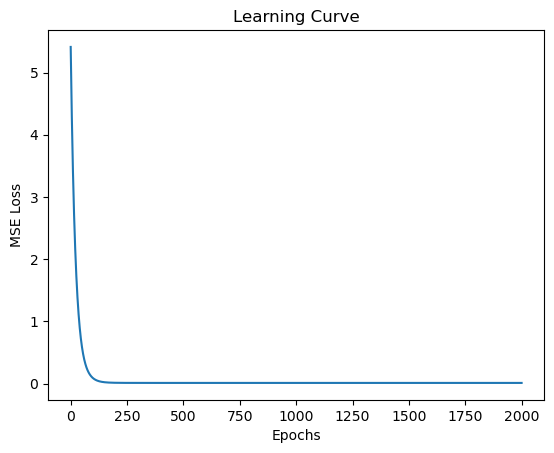

In [82]:

plt.plot(error_hist)
plt.title("Learning Curve")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.show()


### Save Ws

In [85]:
np.save("w_of_multi_reg", w )

### Test the Model

In [87]:
w = np.load("w_of_multi_reg.npy")
Test_Data = pd.read_csv("data/usa-housing-test-preprocessed.csv")
test_set = np.array(Test_Data)[:, 1:]
x_test = test_set[:, 0:5]
y_test = test_set[:, 5]
print(y_test.shape)

x_test = np.hstack((np.ones((x_test.shape[0], 1)), x_test))
y_test_hat = multi_reg(x_test, w)

print("MAE:", Mae(y_test, y_test_hat))
print("R2:", R2(y_test, y_test_hat))


(1500,)
MAE: 0.08113556608538099
R2: 0.9146818498847336
